In [1]:
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
import glob as glob
import SolverCQWs as solver
from IPython.display import display, Math
from tabulate import tabulate
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
plt.style.use('/media/labfiles/lab-codes/plot-styles/plotstyle.mplstyle')

Current PATH:/media/labfiles/ruco/phd-ssp/numerical-results
The data folder already exist


In [18]:
%%time

class Structure(object): pass
s = Structure() # this will be our datastructure
s.structure_name="m43523"
# TEMPERATURE
s.T = 30#Kelvin
# Binding Energy
s.HHBinding =6.1e-3 #meV
s.LHBinding =6.8e-3 #meV
# Band Offset ratios
s.Qc = 0.65
s.Qv = 0.35

# Total subband number to be calculated for electrons
s.subbands = 2
# APPLIED ELECTRIC FIELD
s.Fapp = 0e4 # (V/m)

# For 1D, z-axis is choosen
s.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s.material =[

             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
            #[ 0.565, 'AlAs',   0.15,   0, 'n','Barrier'],
            #[ 23.74,'GaAs'  ,      0,   0, 'n','Well'],
            [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
            #[ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

structure = s
nm = 1e-9
# RUN SIMULATION
model = solver.StructureFrom(structure) #

xaxis=model.xaxis/nm
cb=model.cb
vb=model.vb
results=solver.Solver(model).QuantumSolutions(absolute =False,Print=True)
xaxis.shape

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5323   |   HH1->-0.0046    |   LH1->-0.0095    |
|   E2-> 1.5412   |   HH2->-0.0055    |   LH2->-0.0164    |
CPU times: user 164 ms, sys: 27.8 ms, total: 192 ms
Wall time: 47.8 ms


(857,)

The plots folder already exist


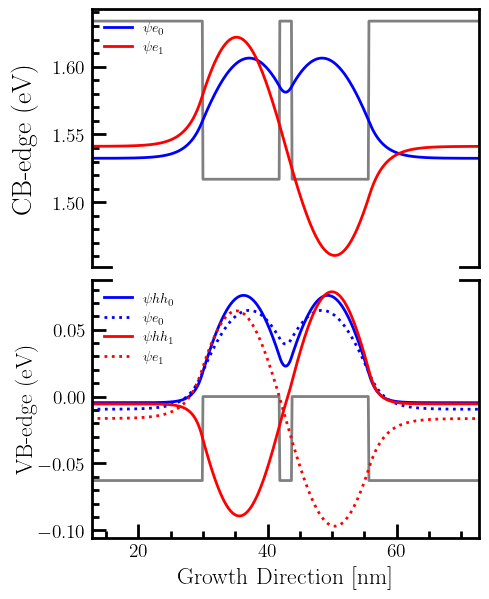

In [19]:
solver.Solver(model).plotting(results,amp=1,axmin=30,axmax=30,eymin =-0.01,eymax=0.01,hymin=-0.2,hymax=-2,save=True)


In [20]:
ls=0
for i in model.material:
    print(i[0])
    ls+=i[0]
ls-30-13.85-(0.424/2)

30.0
11.87
1.98
11.87
30.0


41.657999999999994

In [21]:
solver.Solver(model).save_data(results,absolute=True)
datafiles=!ls data
for i,j in enumerate(datafiles):
    print(i,j)

0 m43172-band-edge.txt
1 m43172-wf-e.txt
2 m43172-wf-hh.txt
3 m43172-wf-lh.txt
4 m43521-band-edge.txt
5 m43521-wf-e.txt
6 m43521-wf-hh.txt
7 m43521-wf-lh.txt
8 m43522-band-edge.txt
9 m43522-wf-e.txt
10 m43522-wf-hh.txt
11 m43522-wf-lh.txt
12 m43523-band-edge.txt
13 m43523-wf-e.txt
14 m43523-wf-hh.txt
15 m43523-wf-lh.txt


In [22]:
d = np.loadtxt('data/'+datafiles[12],delimiter=',')
d.shape

(857, 3)

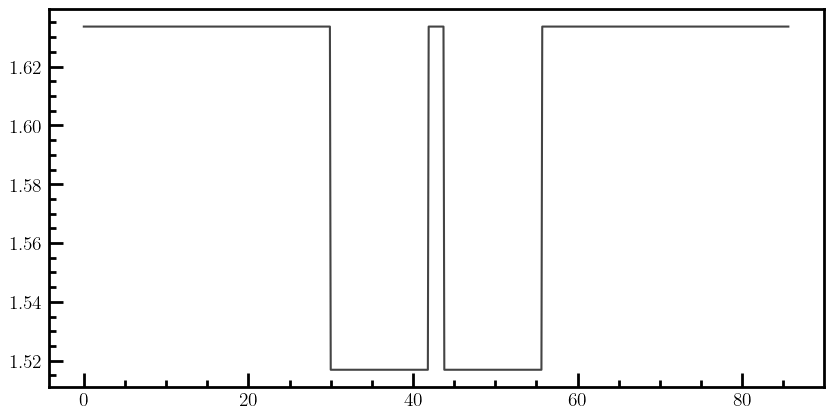

In [23]:
plt.plot(d[:,0],d[:,1])